In [61]:
import pandas as pd
import numpy as np

# Dimensionality reduction: preprocessing.
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Dimensionality reduction: PCA.
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# Dimensionality reduction: UMAP.
import umap.umap_ as umap
from umap import utils

# visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.data_transformers.disable_max_rows()

# Progress tracking
from tqdm import tqdm


#from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from multiprocessing.pool import ThreadPool as Pool
import os

import random
import string


# Show all columns
pd.set_option('display.max_columns', None)


In [62]:
df = pd.read_csv('UNSUPERVISED_LEARNING airbnb_data.csv').drop(columns=['Unnamed: 0'])

<ipython-input-62-4286fc32a1a5>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UNSUPERVISED_LEARNING airbnb_data.csv').drop(columns=['Unnamed: 0'])


In [63]:
df.head()

,listing_id,listing_url,is_superhost,is_premium,rating,n_reviews,country,state,city,county,postcode,listing_title,n_pictures,entire_home,hotel_room,private_room,shared_room,latitude,longitude,price,perc_discount,n_guests,n_bedrooms,n_beds,n_baths,rating_cleanliness,rating_communication,rating_checkin,rating_accuracy,rating_location,rating_value,n_amenities,amenities_services,amenities_heat_cool,amenities_bedroom_laundry,amenities_kitchen_dining,amenities_safety,amenities_parking_facilities,amenities_internet_office,amenities_not_included,amenities_entertainment,amenities_bathroom,amenities_outdoor,amenities_location_features,amenities_family,amenities_scenic_views,bed_king,bed_queen,bed_double,bed_single,bed_sofa,bed_air,bed_floor,bed_bunkbed,bed_hammock,bed_baby,description,description_sentiment_score,description_length,description_reading_level,image_1,image_2,image_3,image_4,image_5,mahalanobis_100,wminkowski_500,cos100,cor100,pca_1st_component,pca_2nd_component,pca_3rd_component,pca_4th_component,pca_5th_component
0,47924385,https://www.airbnb.com/rooms/47924385,1,0,4.86,207.0,United States,Colorado,Flagler,Kit Carson County,80815.0,Home in Flagler,9.0,1,0,0,0,39.29294,-103.06429,77,0.000000,3.0,1.0,1.0,1.0,4.8,5.0,4.9,4.9,4.9,4.9,35.0,3.0,2.0,10.0,5.0,4.0,2.0,2.0,3.0,1.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cozy little house in the town of Flagler just ...,0.9436,117.0,7.0,https://a0.muscache.com/im/pictures/40a53028-5...,https://a0.muscache.com/im/pictures/66d3a0d5-b...,https://a0.muscache.com/im/pictures/a7339783-c...,https://a0.muscache.com/im/pictures/f8ea448c-d...,https://a0.muscache.com/im/pictures/1a2a5d6b-f...,1,3,1,0,1.093320,-1.858987,0.430679,-0.727487,-0.506347
1,12964075,https://www.airbnb.com/rooms/12964075,1,0,4.87,419.0,United States,Colorado,Flagler,Kit Carson County,80815.0,Private room in Flagler,11.0,0,0,1,0,39.29492,-103.06372,65,0.000000,3.0,1.0,1.0,1.0,4.8,4.9,5.0,5.0,4.9,4.9,31.0,3.0,3.0,7.0,4.0,2.0,2.0,2.0,1.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,You’ll love my place because of the quiet loca...,0.9402,30.0,NaN,https://a0.muscache.com/im/pictures/b6b6703f-b...,https://a0.muscache.com/im/pictures/49b235b7-7...,https://a0.muscache.com/im/pictures/478c7fd6-7...,https://a0.muscache.com/im/pictures/1b6947f8-2...,https://a0.muscache.com/im/pictures/ce671a50-b...,1,4,0,1,1.966110,-3.133493,0.779290,1.744401,-0.889531
2,42124659,https://www.airbnb.com/rooms/42124659,1,0,4.84,310.0,United States,Colorado,Rapid City,Kit Carson County,80815.0,Private room in Rapid City,8.0,0,0,1,0,44.06709,-103.09539,35,0.466667,2.0,1.0,1.0,1.0,4.9,4.9,4.9,4.9,4.8,4.9,34.0,4.0,2.0,5.0,10.0,5.0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/da72b603-5...,https://a0.muscache.com/im/pictures/db8d3295-c...,https://a0.muscache.com/im/pictures/593bb4f9-f...,https://a0.muscache.com/im/pictures/1eda16e4-2...,https://a0.muscache.com/im/pictures/2813ffe1-2...,1,0,0,1,2.307508,-2.804413,1.164997,2.146546,-1.841550
3,4596261,https://www.airbnb.com/rooms/4596261,1,0,4.96,114.0,United States,Colorado,Kenton,Kit Carson County,80815.0,Farm stay in Kenton,30.0,1,0,0,0,36.91348,-102.98055,150,0.000000,11.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,69.0,4.0,6.0,9.0,16.0,5.0,1.0,2.0,0.0,2.0,7.0,6.0,2.0,6.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"A self-catering vacation rental, Mesa Valley G...",0.9396,341.0,9.0,https://a0.muscache.com/im/pictures/57722869/d...,https://a0.muscache.com/im/pictures/57724566/3...,https://a0.muscache.com/im/pictures/99823072/9...,https://a0.muscache.com/im/pictures/57722992/e...,https://a0.muscache.com/im/pictures/57723008/5...,1,1,1,0,-5.706684,-0.308405,-0.165048,0.486803,0.881907
4,27028111,https://www.airbnb.com/rooms/27028111,1,0,4.96,119.0,United States,Colorado,Bridgeport,Kit Carson County,80815.0,Cabin in Bridgeport,11.0,1,0,0,0,41.62812,-103.01164,90,0.000000,7.0,2.0,4.0,1.0,5.0

In [4]:
df['image_1'][0]

'https://a0.muscache.com/im/pictures/40a53028-5677-48f5-a74e-59c71b396ec7.jpg?im_w=720'

In [5]:
import urllib.request
from PIL import Image
import cv2

urllib.request.urlretrieve(df['image_1'][0], 'img.jpg')

img = cv2.imread('img.jpg')

In [6]:
h, w, d = img.shape

(h * w * d)/1024/1024

1.9775390625

In [7]:
mb_values = []


for i in tqdm(range(len(df[:50]))):
    urllib.request.urlretrieve(df['image_1'][i], 'img.jpg')
    img = cv2.imread('img.jpg')
    h, w, d = img.shape
    mb_size = (h * w * d)/1024/1024
    mb_values.append(mb_size)

100%|██████████| 50/50 [00:08<00:00,  6.22it/s]


(array([ 3.,  1., 17., 22.,  0.,  0.,  1.,  0.,  1.,  5.]),
 array([0.72097778, 0.84663391, 0.97229004, 1.09794617, 1.22360229,
        1.34925842, 1.47491455, 1.60057068, 1.72622681, 1.85188293,
        1.97753906]),
 <BarContainer object of 10 artists>)

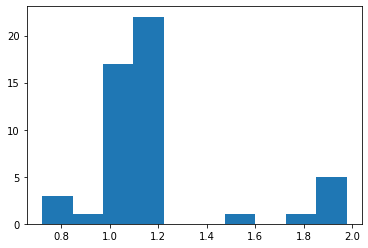

In [8]:
plt.hist(mb_values)

In [9]:
sharpness_values = []

for i in tqdm(range(len(df[:50]))):
    urllib.request.urlretrieve(df['image_1'][i], 'img.jpg')
    img = cv2.imread('img.jpg')
    laplacian = cv2.Laplacian(img,cv2.CV_64F)
    gnorm = np.sqrt(laplacian**2)
    sharpness = np.average(gnorm)
    sharpness_values.append(sharpness)

100%|██████████| 50/50 [00:07<00:00,  6.63it/s]


(array([6., 7., 9., 6., 8., 3., 2., 0., 2., 7.]),
 array([ 2.0679695 ,  6.34285127, 10.61773305, 14.89261482, 19.16749659,
        23.44237836, 27.71726014, 31.99214191, 36.26702368, 40.54190546,
        44.81678723]),
 <BarContainer object of 10 artists>)

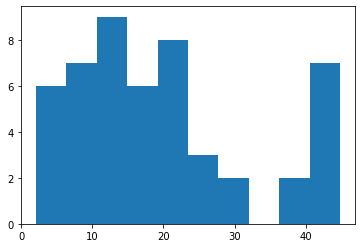

In [10]:
plt.hist(sharpness_values)

In [11]:
def get_image(url):
    suffix = ''.join(random.choices(string.ascii_lowercase, k=5))
    urllib.request.urlretrieve(url, 'img_{}.jpg'.format(suffix))
    img = cv2.imread('img_{}.jpg'.format(suffix))
    
    os.remove('img_{}.jpg'.format(suffix))
    
    #resp = urllib.urlopen(url)
    #img = np.asarray(bytearray(resp.read()), dtype="uint8")
    #img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    return img


def image_size(url):
    try:
        img = get_image(url)
        h, w, d = img.shape
        mb_size = (h * w * d)/1024/1024
        return mb_size
    except:
        return None

def image_sharpness(url):
    try:
        img = get_image(url)
        laplacian = cv2.Laplacian(img,cv2.CV_64F)
        gnorm = np.sqrt(laplacian**2)
        sharpness = np.average(gnorm)
        return sharpness
    except:
        return None

In [ ]:
img1_size = []
img2_size = []
img3_size = []
img4_size = []
img5_size = []

img1_sharp = []
img2_sharp = []
img3_sharp = []
img4_sharp = []
img5_sharp = []


with Pool(8) as pool:

    for result in tqdm(pool.imap(image_size, df['image_1'])):
        img1_size.append(result)
        
    for result in tqdm(pool.imap(image_size, df['image_2'])):
        img2_size.append(result)
        
    for result in tqdm(pool.imap(image_size, df['image_3'])):
        img3_size.append(result)
        
    for result in tqdm(pool.imap(image_size, df['image_4'])):
        img4_size.append(result)
        
    for result in tqdm(pool.imap(image_size, df['image_5'])):
        img5_size.append(result)
        
    for result in tqdm(pool.imap(image_sharpness, df['image_1'])):
        img1_sharp.append(result)
        
    for result in tqdm(pool.imap(image_sharpness, df['image_2'])):
        img2_sharp.append(result)
        
    for result in tqdm(pool.imap(image_sharpness, df['image_3'])):
        img3_sharp.append(result)
        
    for result in tqdm(pool.imap(image_sharpness, df['image_4'])):
        img4_sharp.append(result)
        
    for result in tqdm(pool.imap(image_sharpness, df['image_5'])):
        img5_sharp.append(result)
    
pool.close()

In [ ]:
listing_ids = [id_ for id_ in df['listing_id']]

results_df = pd.DataFrame(data={
    'listing_id': listing_ids,
    'image_1_size': img1_size,
    'image_2_size': img2_size,
    'image_3_size': img3_size,
    'image_4_size': img4_size,
    'image_5_size': img5_size,
    'image_1_sharpness': img1_sharp,
    'image_2_sharpness': img2_sharp,
    'image_3_sharpness': img3_sharp,
    'image_4_sharpness': img4_sharp,
    'image_5_sharpness': img5_sharp
})

In [ ]:
results_df.head()

In [ ]:
results_df.to_csv('image_quality.csv')

In [12]:
results_df = pd.read_csv('image_quality.csv')

(array([4.7596e+04, 3.1612e+04, 1.8000e+04, 1.1660e+03, 1.5100e+02,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.28015137, 1.00401306, 1.72787476, 2.45173645, 3.17559814,
        3.89945984, 4.62332153, 5.34718323, 6.07104492, 6.79490662,
        7.51876831]),
 <BarContainer object of 10 artists>)

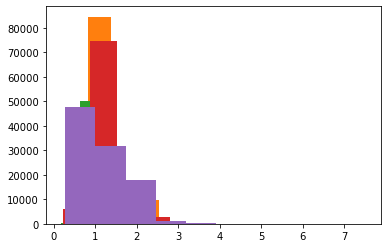

In [13]:
plt.hist(results_df['image_1_size'].dropna())
plt.hist(results_df['image_2_size'].dropna())
plt.hist(results_df['image_3_size'].dropna())
plt.hist(results_df['image_4_size'].dropna())
plt.hist(results_df['image_5_size'].dropna())

(array([3.2025e+04, 4.4861e+04, 1.3446e+04, 4.8140e+03, 2.2080e+03,
        8.2500e+02, 2.6700e+02, 6.8000e+01, 1.2000e+01, 4.0000e+00]),
 array([ 0.67555102, 10.33083748, 19.98612395, 29.64141041, 39.29669687,
        48.95198333, 58.60726979, 68.26255625, 77.91784271, 87.57312918,
        97.22841564]),
 <BarContainer object of 10 artists>)

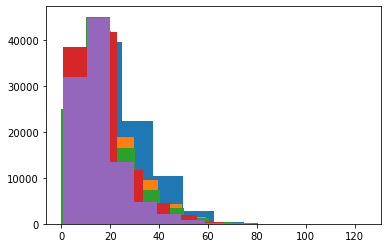

In [14]:
plt.hist(results_df['image_1_sharpness'].dropna())
plt.hist(results_df['image_2_sharpness'].dropna())
plt.hist(results_df['image_3_sharpness'].dropna())
plt.hist(results_df['image_4_sharpness'].dropna())
plt.hist(results_df['image_5_sharpness'].dropna())

In [15]:
results_df.max()

Unnamed: 0           1.001140e+05
listing_id           7.878119e+17
image_1_size         3.619308e+00
image_2_size         5.961456e+00
image_3_size         4.591599e+00
image_4_size         6.684494e+00
image_5_size         7.518768e+00
image_1_sharpness    1.244191e+02
image_2_sharpness    9.784592e+01
image_3_sharpness    1.004432e+02
image_4_sharpness    1.101529e+02
image_5_sharpness    9.722842e+01
dtype: float64

In [16]:
print('1st')
print('Index, max value:', results_df['image_1_size'].idxmax())
print('Index, min value:', results_df['image_1_size'].idxmin())

print('2nd')
print('Index, max value:', results_df['image_2_size'].idxmax())
print('Index, min value:', results_df['image_2_size'].idxmin())

print('3rd')
print('Index, max value:', results_df['image_3_size'].idxmax())
print('Index, min value:', results_df['image_3_size'].idxmin())

print('4th')
print('Index, max value:', results_df['image_4_size'].idxmax())
print('Index, min value:', results_df['image_4_size'].idxmin())

print('5th')
print('Index, max value:', results_df['image_5_size'].idxmax())
print('Index, min value:', results_df['image_5_size'].idxmin())

1st
Index, max value: 46229
Index, min value: 22731
2nd
Index, max value: 26408
Index, min value: 30202
3rd
Index, max value: 91679
Index, min value: 52145
4th
Index, max value: 87178
Index, min value: 9444
5th
Index, max value: 87178
Index, min value: 40267


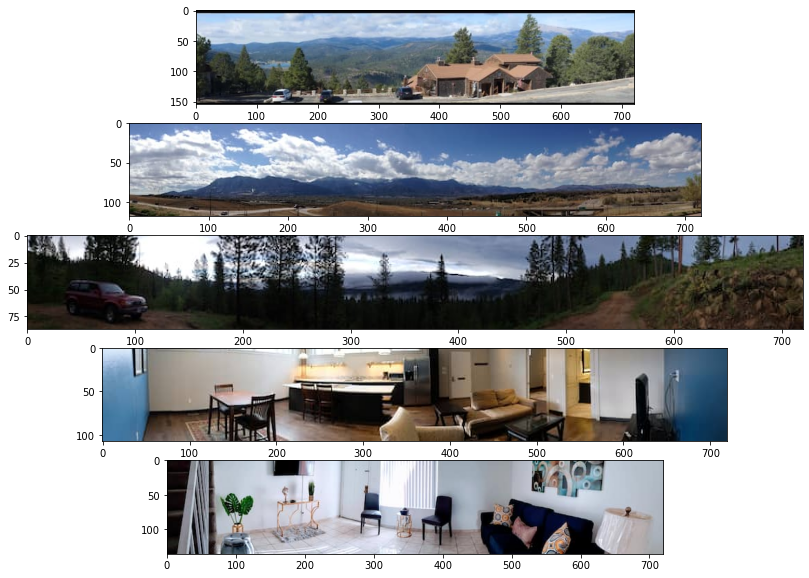

In [17]:
fig, ax = plt.subplots(5, figsize=(20,10))

ax[0].imshow(get_image(df['image_1'][22731])[:,:,::-1])
ax[1].imshow(get_image(df['image_2'][30202])[:,:,::-1])
ax[2].imshow(get_image(df['image_3'][52145])[:,:,::-1])
ax[3].imshow(get_image(df['image_4'][9444])[:,:,::-1])
ax[4].imshow(get_image(df['image_5'][40267])[:,:,::-1])


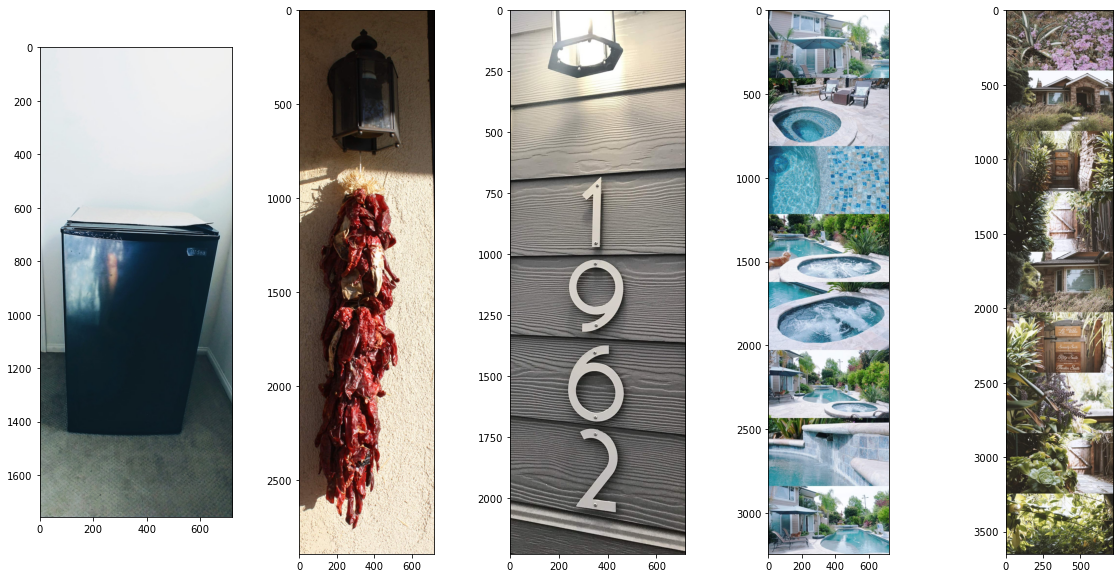

In [18]:
fig, ax = plt.subplots(1,5, figsize=(20,10))

ax[0].imshow(get_image(df['image_1'][46229])[:,:,::-1])
ax[1].imshow(get_image(df['image_2'][26408])[:,:,::-1])
ax[2].imshow(get_image(df['image_3'][91679])[:,:,::-1])
ax[3].imshow(get_image(df['image_4'][87178])[:,:,::-1])
ax[4].imshow(get_image(df['image_5'][87178])[:,:,::-1])



In [19]:
print('1st')
print('Index, max value:', results_df['image_1_sharpness'].idxmax())
print('Index, min value:', results_df['image_1_sharpness'].idxmin())

print('2nd')
print('Index, max value:', results_df['image_2_sharpness'].idxmax())
print('Index, min value:', results_df['image_2_sharpness'].idxmin())

print('3rd')
print('Index, max value:', results_df['image_3_sharpness'].idxmax())
print('Index, min value:', results_df['image_3_sharpness'].idxmin())

print('4th')
print('Index, max value:', results_df['image_4_sharpness'].idxmax())
print('Index, min value:', results_df['image_4_sharpness'].idxmin())

print('5th')
print('Index, max value:', results_df['image_5_sharpness'].idxmax())
print('Index, min value:', results_df['image_5_sharpness'].idxmin())

1st
Index, max value: 51685
Index, min value: 41060
2nd
Index, max value: 54444
Index, min value: 60261
3rd
Index, max value: 87769
Index, min value: 96813
4th
Index, max value: 51685
Index, min value: 1736
5th
Index, max value: 80373
Index, min value: 51569


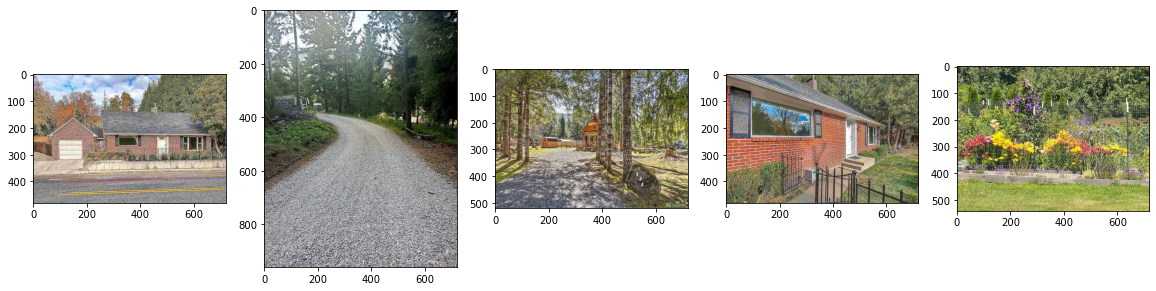

In [20]:
fig, ax = plt.subplots(1,5, figsize=(20,10))

ax[0].imshow(get_image(df['image_1'][51685])[:,:,::-1])
ax[1].imshow(get_image(df['image_2'][54444])[:,:,::-1])
ax[2].imshow(get_image(df['image_3'][87769])[:,:,::-1])
ax[3].imshow(get_image(df['image_4'][51685])[:,:,::-1])
ax[4].imshow(get_image(df['image_5'][80373])[:,:,::-1])


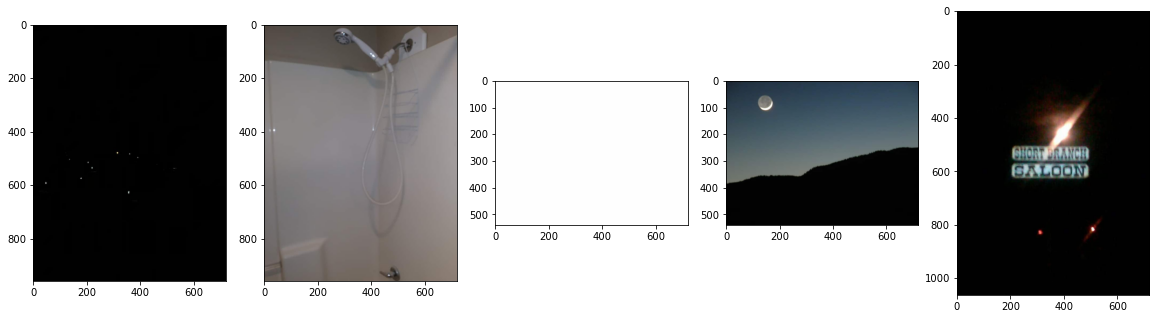

In [21]:
fig, ax = plt.subplots(1,5, figsize=(20,10))

ax[0].imshow(get_image(df['image_1'][41060])[:,:,::-1])
ax[1].imshow(get_image(df['image_2'][60261])[:,:,::-1])
ax[2].imshow(get_image(df['image_3'][96813])[:,:,::-1])
ax[3].imshow(get_image(df['image_4'][1736])[:,:,::-1])
ax[4].imshow(get_image(df['image_5'][51569])[:,:,::-1])


In [23]:
corr_df = df[['price']].join(results_df).drop(columns=['listing_id'])

corr_df.corr()

,price,Unnamed: 0,image_1_size,image_2_size,image_3_size,image_4_size,image_5_size,image_1_sharpness,image_2_sharpness,image_3_sharpness,image_4_sharpness,image_5_sharpness
price,1.000000,-0.042441,-0.063583,-0.064452,-0.073671,-0.080729,-0.082631,0.060437,0.061449,0.064052,0.068551,0.068667
Unnamed: 0,-0.042441,1.000000,0.011071,0.004498,0.006763,0.005233,0.007172,0.023477,0.026278,0.014470,0.007518,0.009839
image_1_size,-0.063583,0.011071,1.000000,0.339031,0.347675,0.340491,0.324743,-0.100517,-0.054762,-0.063476,-0.059791,-0.054434
image_2_size,-0.064452,0.004498,0.339031,1.000000,0.434798,0.392884,0.361962,-0.084512,-0.108089,-0.083794,-0.077220,-0.071604
image_3_size,-0.073671,0.006763,0.347675,0.434798,1.000000,0.458374,0.409510,-0.080879,-0.071505,-0.128702,-0.080042,-0.070948
image_4_size,-0.080729,0.005233,0.340491,0.392884,0.458374,1.000000,0.475796,-0.092293,-0.076812,-0.092744,-0.142363,-0.090742
image_5_size,-0.082631,0.007172,0.324743,0.361962,0.409510,0.475796,1.000000,-0.092277,-0.079006,-0.091208,-0.091641,-0.150962
image_1_sharpness,0.060437,0.023477,-0.100517,-0.084512,-0.080879,-0.092293,-0.092277,1.000000,0.381414,0.334495,0.307577,0.277696
image_2_sharpness,0.061449,0.026278,-0.054762,-0.108089,-0.071505,-0.076812,-0.079006,0.381414,1.000000,0.428873,0.347392,0.306070
image_3_sharpness,0.064052,0.014470,-0.063476,-0.083794,-0.128702,-0.092744,-0.091208,0.334495,0.428873,1.000000,0.450818,0.363110


<AxesSubplot:>

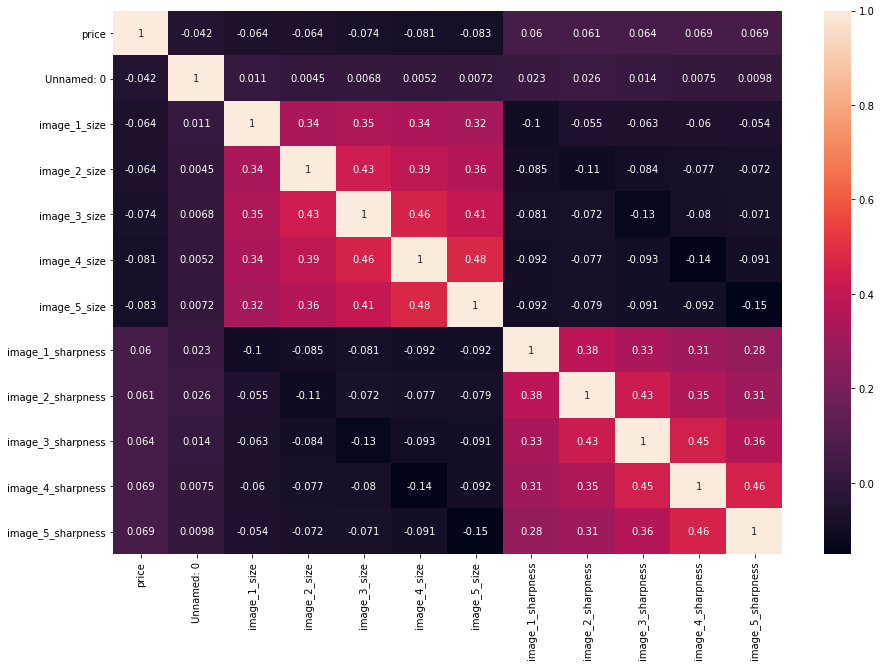

In [24]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(15,10))
sns.heatmap(corr_df.corr(), annot=True)

In [39]:
#import imquality.brisque as brisque
from brisque import BRISQUE
import PIL.Image

In [40]:
obj = BRISQUE(url=True)

obj.score(df['image_1'][0])

0.7750708016497754

In [43]:
brisque1 = []
brisque2 = []
brisque3 = []
brisque4 = []
brisque5 = []

for i in tqdm(range(len(df[:50]))):
    try:
        score = obj.score(df['image_1'][i])
        brisque1.append(score)
    except:
        brisque1.append(None)
    try:
        score = obj.score(df['image_2'][i])
        brisque2.append(score)
    except:
        brisque2.append(None)
    try:
        score = obj.score(df['image_3'][i])
        brisque3.append(score)
    except:
        brisque3.append(None)
    try:
        score = obj.score(df['image_4'][i])
        brisque4.append(score)
    except:
        brisque4.append(None)
    try:
        score = obj.score(df['image_5'][i])
        brisque5.append(score)
    except:
        brisque5.append(None)

100%|██████████| 50/50 [01:59<00:00,  2.38s/it]


In [44]:
print(brisque1)
print(brisque2)
print(brisque3)
print(brisque4)
print(brisque5)

[0.7750708016497754, 33.26231333533039, 40.30049661225368, 2.933469044421571, 5.329461418058685, 12.716100122283791, 26.034070860186006, 28.213825654310853, 30.943306383207386, 30.943306383207386, 30.943306383207386, 29.581674020648478, 14.019002344863424, 31.55994606558565, 30.943306383207386, 30.943306383207386, 30.943306383207386, 30.943306383207386, 22.133399288250615, 19.11956754893626, 11.719317960234292, 8.115202988111008, 21.150286186650504, 23.69411941604139, 26.337058840493313, 20.512287180961124, 10.788780505004041, 17.574720871306766, 22.910080296094378, 29.065631727630574, 34.41849157712815, 23.59844170489643, 4.019452392016518, 5.659625006933169, 13.821423117474268, 33.32625380324825, 41.12796037553127, 42.21244313639485, 24.56958399129789, 40.23886528011255, 49.48152018756397, 12.589807803271327, 23.591131653875294, 6.4012076950828884, 6.573212040445895, 17.786241068637963, 9.045299262866678, -3.9405482525496893, -4.054415223935649, 62.137535130948976]
[6.88652679440267,

<AxesSubplot:>

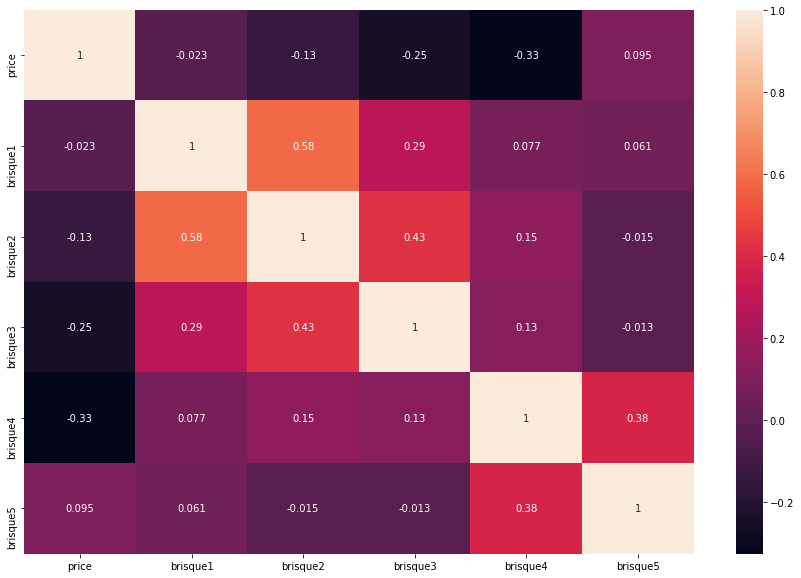

In [46]:
test_frame = pd.DataFrame(data={
    'price': [x for x in df['price'][:50]],
    'brisque1': brisque1,
    'brisque2': brisque2,
    'brisque3': brisque3,
    'brisque4': brisque4,
    'brisque5': brisque5
})


# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(15,10))
sns.heatmap(test_frame.corr(), annot=True)

In [47]:
brisque1 = []
brisque2 = []
brisque3 = []
brisque4 = []
brisque5 = []


obj = BRISQUE(url=True)

def brisque_score(url, obj=obj):
    try:
        score = obj.score(url)
        return score
    except:
        return None
    

In [48]:
with Pool(8) as pool:

    for result in tqdm(pool.imap(brisque_score, df['image_1'])):
        brisque1.append(result)
        
    for result in tqdm(pool.imap(brisque_score, df['image_2'])):
        brisque2.append(result)
        
    for result in tqdm(pool.imap(brisque_score, df['image_3'])):
        brisque3.append(result)
        
    for result in tqdm(pool.imap(brisque_score, df['image_4'])):
        brisque4.append(result)
        
    for result in tqdm(pool.imap(brisque_score, df['image_5'])):
        brisque5.append(result)
        
    
pool.close()

100115it [6:06:16,  4.56it/s]
2372it [08:43,  5.31it/s]/opt/anaconda3/lib/python3.8/site-packages/brisque/brisque.py:46: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = skimage.color.rgb2gray(image)
100115it [5:57:52,  4.66it/s]
96806it [5:54:58,  4.69it/s]/opt/anaconda3/lib/python3.8/site-packages/brisque/brisque.py:123: RuntimeWarning: invalid value encountered in divide
  return squares_sum / ((filtered_values.shape))
100115it [6:06:19,  4.55it/s]
100115it [6:13:21,  4.47it/s]
100115it [6:27:43,  4.30it/s]


In [49]:
print(len(brisque1))
print(len(brisque2))
print(len(brisque3))
print(len(brisque4))
print(len(brisque5))

100115
100115
100115
100115
100115


In [50]:
test_frame = pd.DataFrame(data={
    'price': [x for x in df['price']],
    'brisque1': brisque1,
    'brisque2': brisque2,
    'brisque3': brisque3,
    'brisque4': brisque4,
    'brisque5': brisque5
})

<AxesSubplot:>

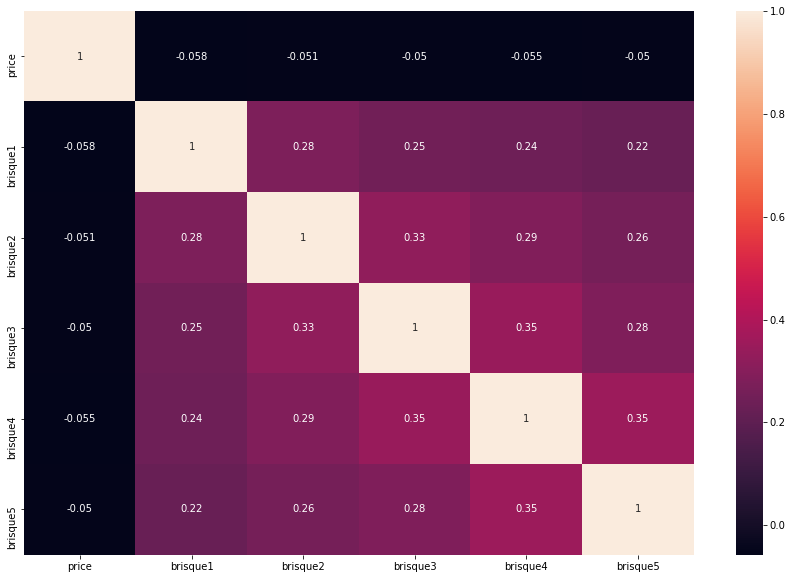

In [51]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(15,10))
sns.heatmap(test_frame.corr(), annot=True)

In [52]:
print('1st')
print('Index, max value:', test_frame['brisque1'].idxmax())
print('Index, min value:', test_frame['brisque1'].idxmin())

print('2nd')
print('Index, max value:', test_frame['brisque2'].idxmax())
print('Index, min value:', test_frame['brisque2'].idxmin())

print('3rd')
print('Index, max value:', test_frame['brisque3'].idxmax())
print('Index, min value:', test_frame['brisque3'].idxmin())

print('4th')
print('Index, max value:', test_frame['brisque4'].idxmax())
print('Index, min value:', test_frame['brisque4'].idxmin())

print('5th')
print('Index, max value:', test_frame['brisque5'].idxmax())
print('Index, min value:', test_frame['brisque5'].idxmin())

1st
Index, max value: 41060
Index, min value: 11529
2nd
Index, max value: 55976
Index, min value: 77830
3rd
Index, max value: 59240
Index, min value: 48675
4th
Index, max value: 8034
Index, min value: 28819
5th
Index, max value: 31604
Index, min value: 26179


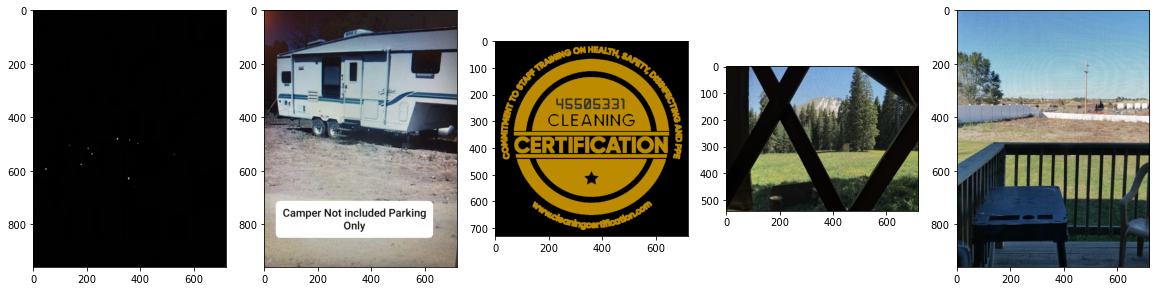

In [53]:
fig, ax = plt.subplots(1,5, figsize=(20,10))

ax[0].imshow(get_image(df['image_1'][41060])[:,:,::-1])
ax[1].imshow(get_image(df['image_2'][55976])[:,:,::-1])
ax[2].imshow(get_image(df['image_3'][59240])[:,:,::-1])
ax[3].imshow(get_image(df['image_4'][8034])[:,:,::-1])
ax[4].imshow(get_image(df['image_5'][31604])[:,:,::-1])


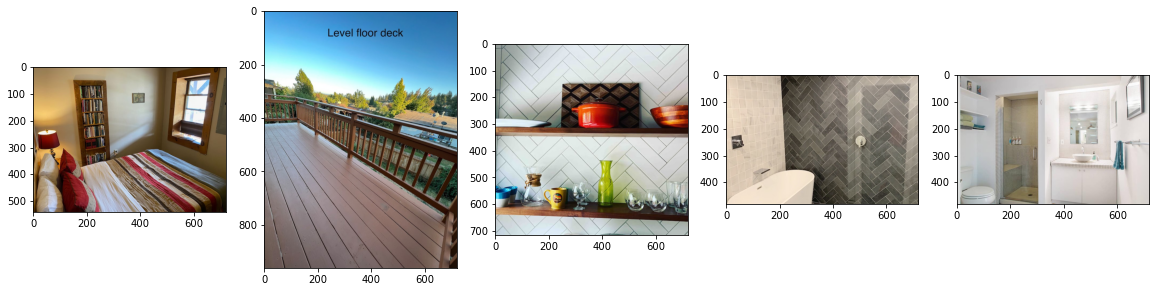

In [54]:
fig, ax = plt.subplots(1,5, figsize=(20,10))

ax[0].imshow(get_image(df['image_1'][11529])[:,:,::-1])
ax[1].imshow(get_image(df['image_2'][77830])[:,:,::-1])
ax[2].imshow(get_image(df['image_3'][48675])[:,:,::-1])
ax[3].imshow(get_image(df['image_4'][28819])[:,:,::-1])
ax[4].imshow(get_image(df['image_5'][26179])[:,:,::-1])


In [60]:
results_df.join(test_frame).drop(columns=['Unnamed: 0','price','listing_id']).to_csv('image_quality.csv')